### Project Introduction

In this project I will show you how to apply gridsearch technique on a deep learning model named **Convolutional Neural Network (CNN)** to find the best model with hyperparameters trained on MNIST database. However, it belongs to classification problem, so the purpose of this project is to maximize accuracy value as much as possible under certain conditions and choose a reasonable training time.


#### MNIST dataset

The [MNIST database](https://en.wikipedia.org/wiki/MNIST_database) is a large database containing handwritten digits modified from [National Institute of Standards and Technology database](https://en.wikipedia.org/wiki/National_Institute_of_Standards_and_Technology), and it is commonly used for training various image processing systems.

The MNIST database contains 60,000 training images and 10,000 testing images.

<p align='left'>
  <img alt="MNIST database" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/MnistExamplesModified.png/480px-MnistExamplesModified.png" width=300 height=200>
</p>

*Sample images from MNIST test dataset ([source](https://en.wikipedia.org/wiki/MNIST_database))*

#### CNN model

<p align='left'>
  <img alt="CNN model arhitecture" src="https://images.datacamp.com/image/upload/v1700043905/image10_f8b261ebf1.png" width=500 height=300>
</p>

*Architecture of the CNNs applied to digit recognition ([source](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53))*

*Convolutional neural network*, or CNN for short, is a powerful netwok applied on many tasks such as image classification, object detection, and facial recognition. It can recognize patterns in data. However, neural Networks in general are composed of a collection of neurons organized in layers, containing their own learnable weights and biases.

There are several key components of a CNN:

- **Input Layer**: This layer decides how many channels does a network accept, if we use RGB images as input, the input layer has three channels, otherwise, it only has one channel if input data are gray images.

- **Convolutional Layers**: The convolutional layers in CNNs are crucial as they hold the learned kernels (weights) that extract features distinguishing different images, which are essential for classification. Each convolutional layer links to previous layers through unique kernels, performing elementwise dot products with the outputs of previous neurons. These operations yield multiple intermediate results, which are summed with the learned bias to produce the convolutional neuron's output or activation map.

- **Activation Functions**: Activation functions performs a vital function in hidden layers to solve complex problems and to analyze and transmit data. Thec common activation functions used in CNN for multi-class classification are ReLU and softmax.

- **Pooling Layers**: Pooling layers in CNNs, such as Max-Pooling used in the Tiny VGG architecture, reduce the network's spatial extent, parameters, and computation. Max-Pooling involves selecting a kernel size and stride length, then sliding the kernel over the input, selecting the largest value at each slice to produce the output. This process helps in reducing the dimensions and computation of the network.

- **Flatten Layer**: The flatten layer converts a three-dimensional tensor into a one-dimensional vector for a fully-connected layer. For example, a 5x5x2 tensor becomes a vector of size 50. This transition is necessary for the softmax function to classify the extracted features from previous convolutional layers.

If you would like to watch the flow of a CNN model, see [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

### How to I complete the homeowrk ?

I will use `GridSearchCV` [API](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from sklearn to complete this project, the tensorflow can not be passes into gridsearchcv function directly, so I need to use a wrapper from tensorflow to wrap tensorflow function into it. Moreover, the MNIST dataset is also loaded fron [tensorflow API](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data).

The table contains hyperparameters to find:

| Hyperparameters | Values to search |
| -- | -- |
| Activation functions | Sigmoid, ReLU, LeakyReLU, PReLU, tanh |
| Loss functions | MSE, Cross-Entropy |
| Batch size | 8, 32, 128 |
| Epochs | **5** |
| Optimizer | **Adam** |

I fix the `Epochs` to 5, and the `Optimizer` to Adam  for faster training.

### Import necessary modules

In [1]:
# mnist database
from tensorflow.keras.datasets import mnist

# data processing
import numpy as np
import tensorflow as tf

# importing the model and layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Keras wrapper for nueral network
# from scikeras.wrappers import KerasClassifier # tensorflow >= 2.7.0
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Grid search hyperparameters
from sklearn.model_selection import GridSearchCV

# helper functions
from utils.grid_helper_functions import preprocessing_data
from utils.grid_helper_functions import show_random_image, export_grid_results, plot_grid_results
from utils.grid_helper_functions import calculate_results

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline   

def create_grid_model(activation, loss):
  """
  Create a model and compile it.
  """
  # Create model object
  inputs = Input(shape=(28, 28, 1), name='input_layer')
  x = Conv2D(1, kernel_size=5, strides=1, padding="Same", activation=activation, name='convolution_layer')(inputs)
  x = MaxPooling2D(padding="same", name='pooling_layer')(x)
  x = Flatten(name='flatten_layer')(x)
  outputs = Dense(10, activation="softmax", name='output_layer')(x)

  model = Model(inputs=inputs, outputs=outputs)

  # Compile the model
  model.compile(optimizer='adam', loss=loss, metrics=["accuracy"])

  return model

### Load dataset: MNIST

In [2]:
# loading data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

### Visualize what our data look like

Be one with our data.

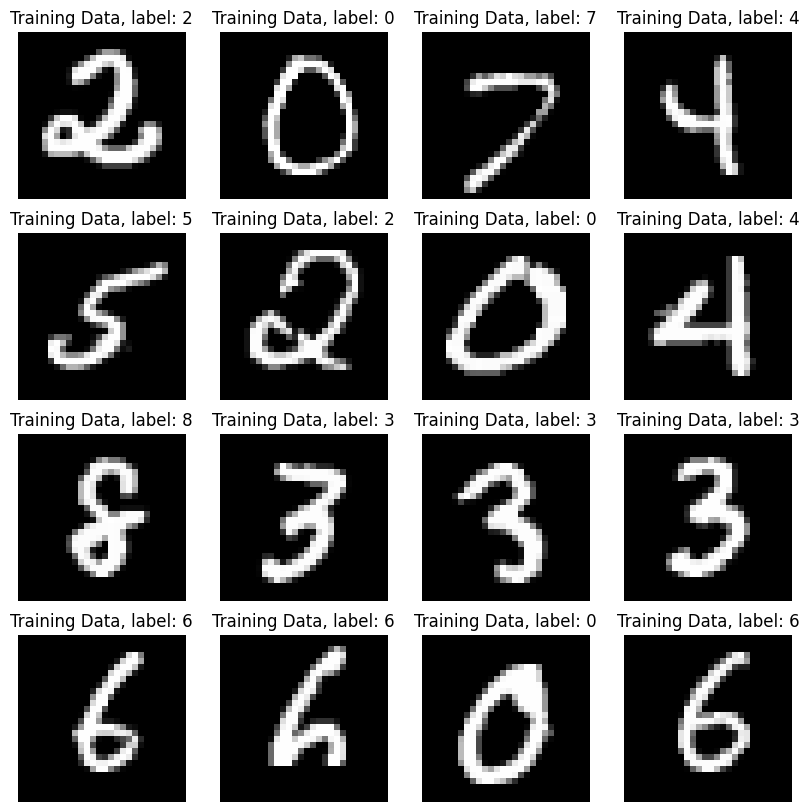

In [3]:
show_random_image(dataset=train_data, labels=train_labels, title='Training Data')

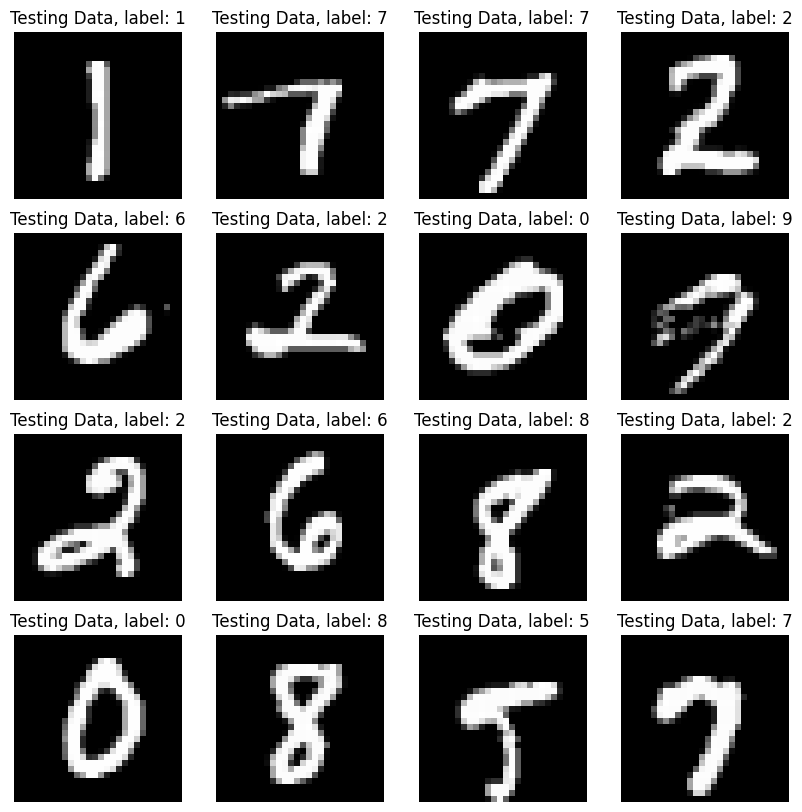

In [4]:
show_random_image(dataset=test_data, labels=test_labels, title='Testing Data')

### Data preprocessing

Before training, I need to preprocess data into model acceptable form:

1. **Reshape**: Reshape every image size to [None, 28, 28, 1].

2. **Normalization**: Normalize pixel number of each images in range 0-255.

3. **One-hot encoding**: Convert categorical labels into one-hot encoding

In [5]:
X_train, X_test, y_train, y_test = preprocessing_data(train_data, test_data, train_labels, test_labels)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)
------------------------------
Before one-hot encoding: 5
After one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Experiment

| Hyperparameters | Values to search |
| -- | -- |
| Activation functions | Sigmoid, ReLU, LeakyReLU, PReLU, tanh |
| Loss functions | MSE, Cross-Entropy |
| Batch size | 8, 32, 128 |
| Epochs | **5** |
| Optimizer | **Adam** |

The mainly hyperparameters expected to be trained are activation functions, loss functions, and batch size.

<u>**Activation functions**</u>

Activation functions play an important role in neural networks, presenting in hidden layers to help neuron solving complex problems such as nonlinear characteristics and vanishing gradient problem.

Here are the activation functions applied in this experiment:

- Sigmoid: $\rho(x) = \frac{1}{1 + e^-x}$

- Rectified Linear Units (ReLU) : $f(x) = max(0, x)$

- LeakyReLU: $f(x) = max(0.1x, x)$

- PReLU: $f(n)= \begin{cases} x, & \text{if } x > 0 \\ ax, & \text{otherwise}\end{cases}$

- Tanh: $tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{1 - e^{-2x}}{1 + e^{-2x}}$


<u>**Loss functions**</u>

Loss functions play an important role on determination of our model performance on dataset.

- Multi-class cross entropy: $\sum_{c=1}^My_{o,c}\log(p_{o,c})$

- Mean Squared Error(MSE): $\sum_{i=1}^{D}(x_i-y_i)^2$


<u>**Batch size**</u>

Batch size is the number of samples feeding into our model at each epoch of training process. It usually is multiples of eight, I use 8, 32, and 128 for experiment.

#### Training

In [6]:
# Set seed for experimental reproducibility
seed = 42
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

# Create model
model = KerasClassifier(build_fn=create_grid_model,
                        epochs=5,
                        validation_split=0.1)

# Create dict datatype for grid search
activations = ['sigmoid', 'relu', 'LeakyReLU', 'PReLU', 'tanh']
batch_sizes = [128, 32, 8]
losses = ['mse', 'categorical_crossentropy']

# Grid search params
param_grid = dict(activation=activations, 
                  loss=losses, 
                  batch_size=batch_sizes)

# Create grid object
grid_model = GridSearchCV(estimator=model, 
                          param_grid=param_grid, 
                          cv=3, 
                          verbose=3, 
                          return_train_score=True)

# Fit the every model
grid_results = grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


Epoch 1/5
282/282 [==============================] - 4s 4ms/step - loss: 0.0823 - accuracy: 0.3327 - val_loss: 0.0641 - val_accuracy: 0.6170
Epoch 2/5
282/282 [==============================] - 1s 3ms/step - loss: 0.0466 - accuracy: 0.7471 - val_loss: 0.0304 - val_accuracy: 0.8500
Epoch 3/5
282/282 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.8354 - val_loss: 0.0213 - val_accuracy: 0.8873
Epoch 4/5
282/282 [==============================] - 1s 4ms/step - loss: 0.0242 - accuracy: 0.8565 - val_loss: 0.0180 - val_accuracy: 0.8988
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0202 - accuracy: 0.8757
[CV 1/3] END activation=sigmoid, batch_size=128, loss=mse;, score=(train=0.876, test=0.870) total time=  10.8s
Epoch 1/5
282/282 [==============================] - 1s 4ms/step - loss: 0.0825 - accuracy: 0.3854 - val_loss: 0.0619 - val_accuracy: 0.7527
Epoch 2/5
282/282 [==============================] - 1s 4ms/step - loss: 0.0439 - acc

#### Analysis

In [7]:
# Check cross-validation results
grid_results.cv_results_

{'mean_fit_time': array([  7.72905707,   5.98985092,  19.72552117,  19.08008536,
         71.54980262,  77.07791082,   6.30590947,   6.26734273,
         16.89559436,  19.91927902,  72.04275306,  74.1409742 ,
          6.86341802,   5.83462429,  18.06668433,  21.29368663,
         83.90425213,  98.61272025,   9.5697155 ,   9.61305062,
         25.81801796,  28.10221036, 100.52909168, 108.67663383,
         10.24572015,  12.74200034,  37.00901643,  31.57073418,
         90.75268253,  98.32465005]),
 'std_fit_time': array([1.86332584, 0.28677482, 0.58853752, 1.18432551, 0.54144247,
        1.59491049, 0.08263556, 0.19743167, 1.56209006, 0.60516658,
        2.15779998, 4.02321249, 0.03039274, 0.01236939, 1.58858766,
        0.78168195, 7.65489355, 3.0172462 , 0.15109067, 0.25014212,
        1.96446502, 2.76492885, 1.02819631, 0.91281188, 0.28714817,
        1.48664416, 2.72841506, 5.64088124, 1.72921307, 0.55067654]),
 'mean_score_time': array([0.63121311, 0.68343329, 1.80326613, 2.100389

In [8]:
# Check best parameters
model_best_params = grid_results.best_params_
model_best_params

{'activation': 'PReLU', 'batch_size': 8, 'loss': 'categorical_crossentropy'}

In [9]:
# Best performance model
best_model = grid_results.best_estimator_

# Check score on testing data
testing_score = best_model.score(X_test, y_test)
testing_score

1250/1250 [==============================] - 5s 4ms/step - loss: 0.2384 - accuracy: 0.9271


0.9271000027656555

In [12]:
y_pred = best_model.predict_proba(X_test)

calculate_results(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

{'accuracy': 92.71000000000001,
 'precision': 92.86,
 'recall': 92.71,
 'f1': 92.73}

✨ We can see that the best hyperparameters:

| hyperparameters | value |
| :-------------: | :---: |
| activation | PReLU |
| batch_size | 8 |
| loss | categorical_crossentropy |

Same as other activation functions such as LeakyReLU and Tanh, PReLU allows some negative values ​​to pass, and the negative values ​​depend on the setting of the value, which means there is room for "learning". If `alpha = 0` is the same as ReLU, `alpha = 0.01` is the same as Leaky ReLU. The  learning accuracy of model is better than ReLU other series are better.

Number eight is the best batch size. However, the less batch size, the more the training time.

For classification problem, categorical_crossentropy is better than MSE loss.

In [13]:
# Let's check the table of training information
grid_df = export_grid_results(grid_result=grid_results)
grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_loss,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
sigmoid_128_mse_,7.729057,1.863326,0.631213,0.027214,sigmoid,128,mse,0.86970,0.87730,0.89325,0.880083,0.009814,29,0.875725,0.887975,0.885275,0.882992,0.005255
sigmoid_128_categorical_crossentropy_,5.989851,0.286775,0.683433,0.035199,sigmoid,128,categorical_crossentropy,0.87390,0.83975,0.88740,0.867017,0.020053,30,0.878750,0.850425,0.880325,0.869833,0.013739
sigmoid_32_mse_,19.725521,0.588538,1.803266,0.035750,sigmoid,32,mse,0.89990,0.90105,0.91590,0.905617,0.007287,26,0.904150,0.909375,0.910300,0.907942,0.002708
sigmoid_32_categorical_crossentropy_,19.080085,1.184326,2.100389,0.155149,sigmoid,32,categorical_crossentropy,0.90135,0.89435,0.91090,0.902200,0.006783,27,0.904450,0.902775,0.908225,0.905150,0.002279
sigmoid_8_mse_,71.549803,0.541442,6.341172,0.239251,sigmoid,8,mse,0.91350,0.90870,0.91845,0.913550,0.003981,13,0.918650,0.919100,0.918850,0.918867,0.000184
sigmoid_8_categorical_crossentropy_,77.077911,1.594910,7.038721,0.117080,sigmoid,8,categorical_crossentropy,0.89925,0.91425,0.91530,0.909600,0.007331,21,0.906350,0.923375,0.915800,0.915175,0.006964
relu_128_mse_,6.305909,0.082636,0.574969,0.025563,relu,128,mse,0.90850,0.90325,0.90690,0.906217,0.002197,24,0.913500,0.912700,0.909700,0.911967,0.001636
relu_128_categorical_crossentropy_,6.267343,0.197432,0.670341,0.063609,relu,128,categorical_crossentropy,0.90340,0.90250,0.91235,0.906083,0.004446,25,0.906475,0.908075,0.913725,0.909425,0.003110
relu_32_mse_,16.895594,1.562090,1.473915,0.100761,relu,32,mse,0.91545,0.90805,0.91525,0.912917,0.003442,15,0.921725,0.917475,0.919850,0.919683,0.001739
relu_32_categorical_crossentropy_,19.919279,0.605167,1.980998,0.046107,relu,32,categorical_crossentropy,0.91075,0.90670,0.91395,0.910467,0.002967,19,0.914250,0.915775,0.918400,0.916142,0.001714


##### Mean of fitting time

[5.834624290466309 - 108.67663383483887]


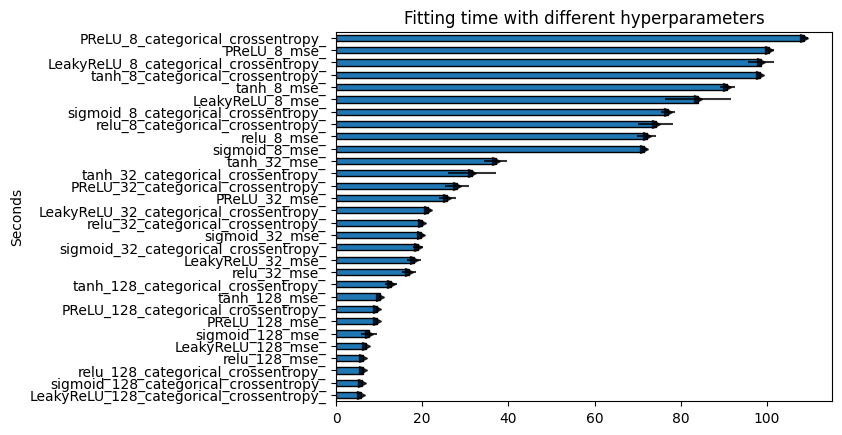

In [41]:
# Fitting time of different hyperparameters
plot_grid_results(grid_df, fit_time=True)

[0.5749688943227133 - 9.358363072077433]


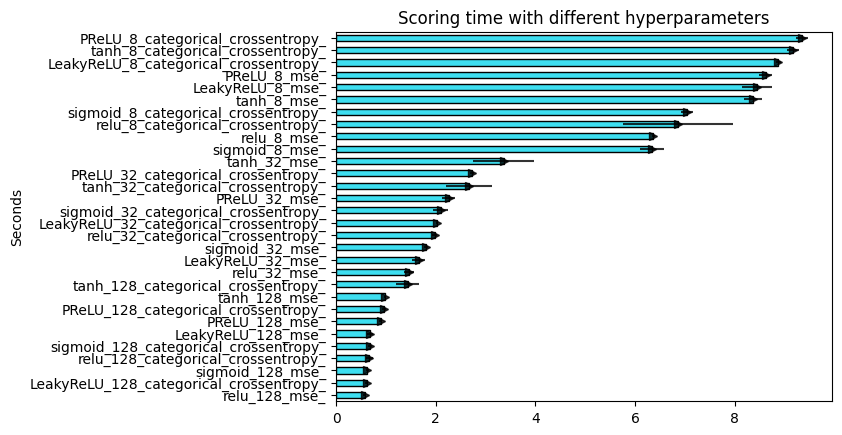

In [42]:
# Scoring time of different hyperparameters
plot_grid_results(grid_df, score_time=True)

✨ We can see that the small batch size, the more time to train.

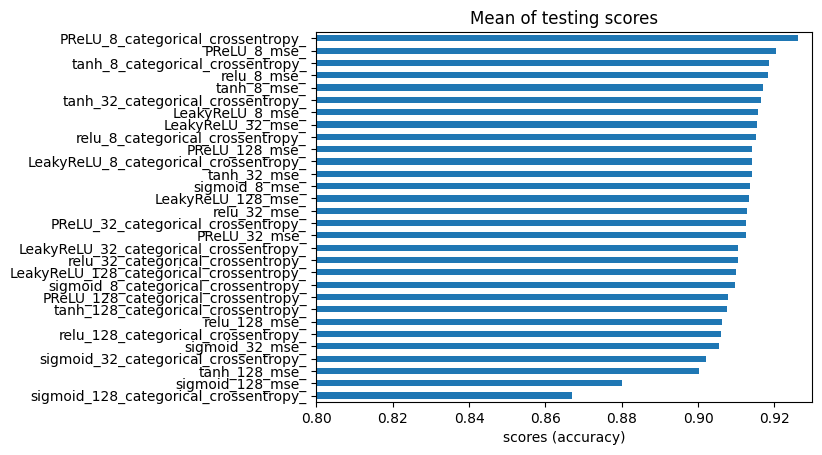

In [29]:
# Mean testing scores
grid_df.mean_test_score.sort_values().plot.barh(title='Mean of testing scores')
plt.xlabel('scores (accuracy)')
plt.xlim([0.8, 0.93])
plt.show()

Train: [0.8698333501815796 - 0.9331833322842916]
Test: [0.8670166532198588 - 0.9262000123659769]



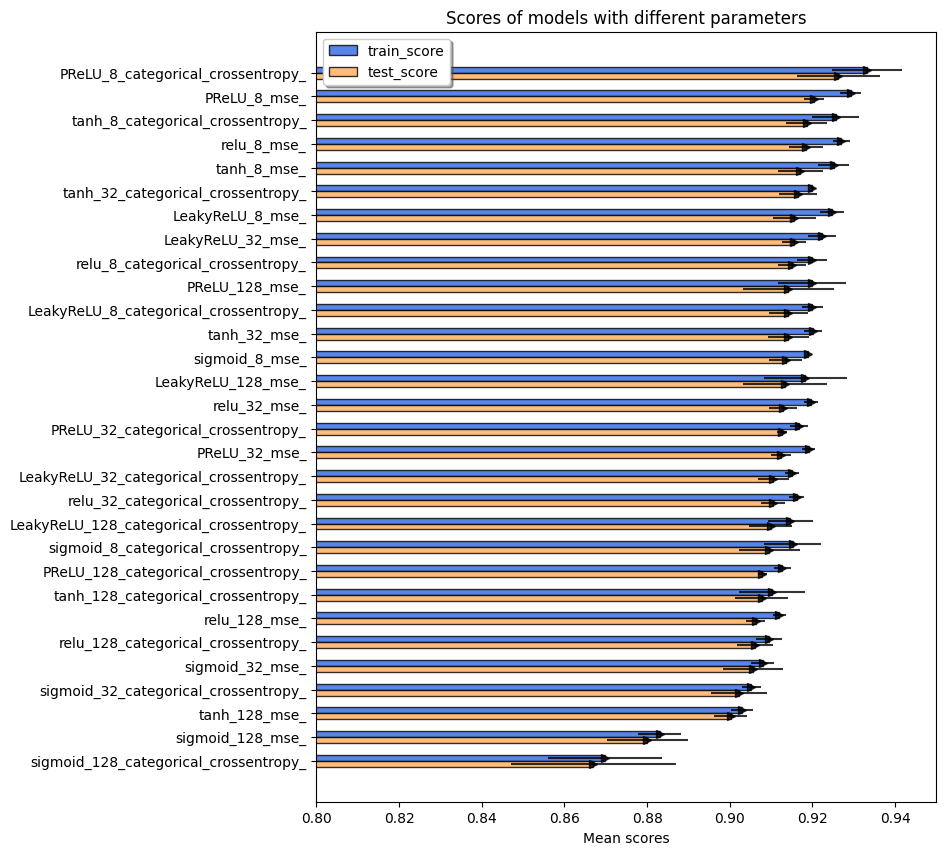

In [40]:
# Both scores of training and testing of models with different hyperparameters
plot_grid_results(grid_df, figsize=(8, 10), lim=(0.80, 0.95))

### Results

✨ Although the training time for batch size 8 is long, the accuracy is guaranteed. However, based on cost considerations such as training time or scoring time, 32 batch size which has similar accuracy but much less training time is a better option. 

Take the example of this experiment, except for the poor performance of the sigmoid function, other activation functions are options that can be considered, and the loss function is not much different. Considering the comprehensive training cost and accuracy, the accuracy is above 90 and the batch size is less than 128 are ideal combinations.

ReLU series are common options for hidden layers of CNN models, moreover, compared to sigmoid which rescales data into [0, 1], Tanh function provides a wider range to be rescaled ([-1, 1]), this may help the model to determine whether the image is bad or good during optimization of training.


<table>
    <thead>
        <tr>
            <th colspan=2>Better Performance</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Accuracy</strong></td>
            <td> > 90% </td>
        </tr>
        <tr>
            <td><strong>Batch Size</strong></td>
            <td> 8, 32 </td>
        </tr>
        <tr>
            <td><strong>Activation Function</strong></td>
            <td> ReLU or Tanh </td>
        </tr>
    </tbody>
</table>

In [39]:
grid_df.to_csv('results/cnn_grid_search_results.csv')